#                                            Task5 
###                                Oasis Infobyte Data Science Internship
####                                               Sales Prediction Using Python
#####                                                                                                     Master simmi 

In [3]:
#importing basic libraries

import numpy as np
import pandas as pd

In [4]:
#reading the dataset

data=pd.read_csv('Advertising.csv')

In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##### Now we have to clean the data

In [6]:
# processing the data

data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#we don't need the 1st column so let's drop that

data=data.iloc[:,1:]

In [9]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
#check for null values

data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [38]:
#Data Visulaization

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sohel\AppData\Local\Temp\ipykernel_12868\1001822327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Newspaper'])


<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

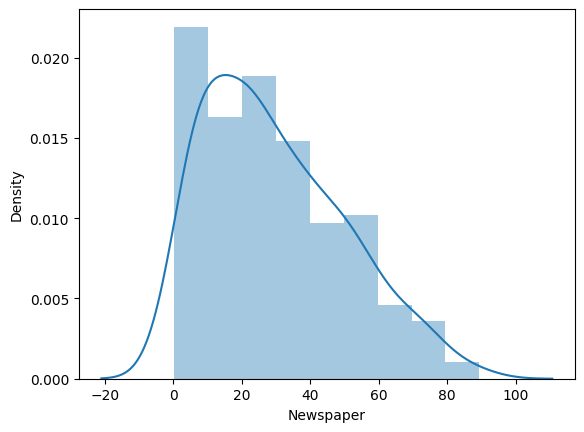

In [44]:
sns.distplot(data['Newspaper'])
     

In [46]:
iqr = data.Newspaper.quantile(0.75) - data.Newspaper.quantile(0.25)


In [47]:
lower_bridge = data["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = data["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-34.449999999999996
91.14999999999999


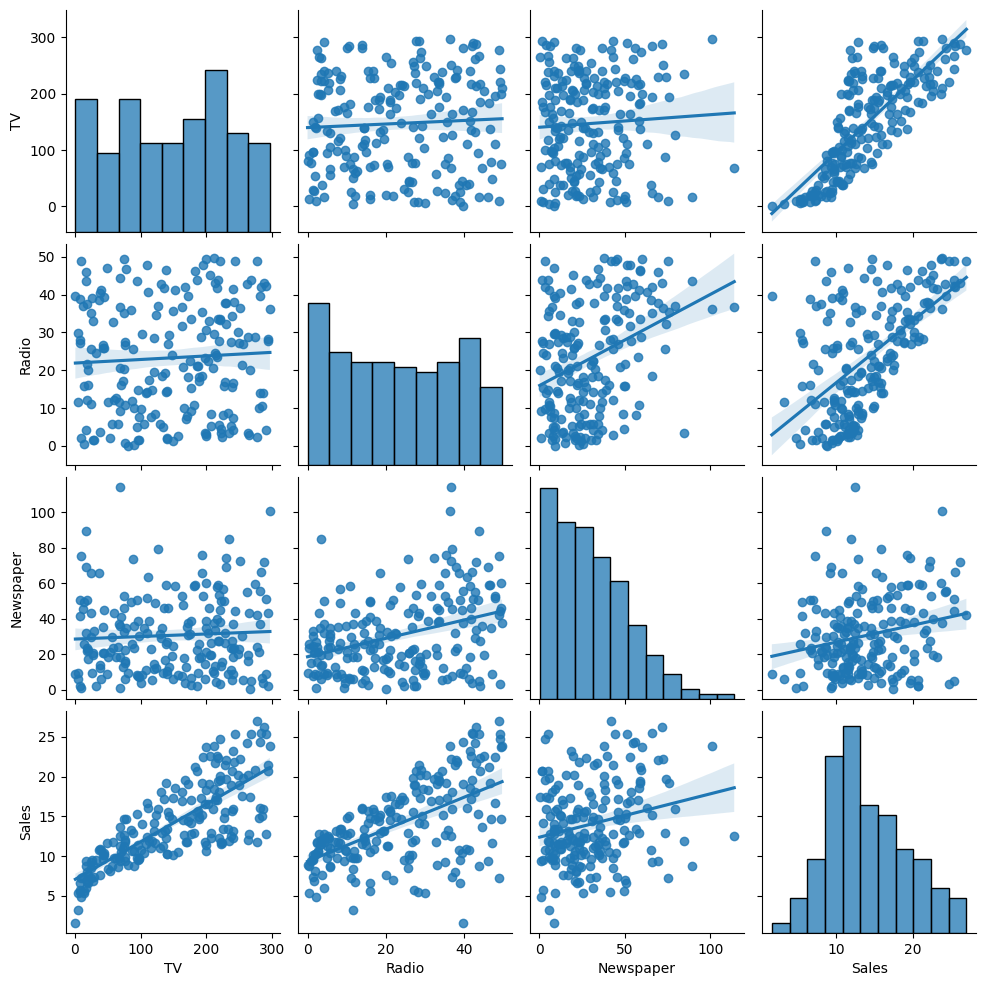

In [13]:
sns.pairplot(data,kind="reg");

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

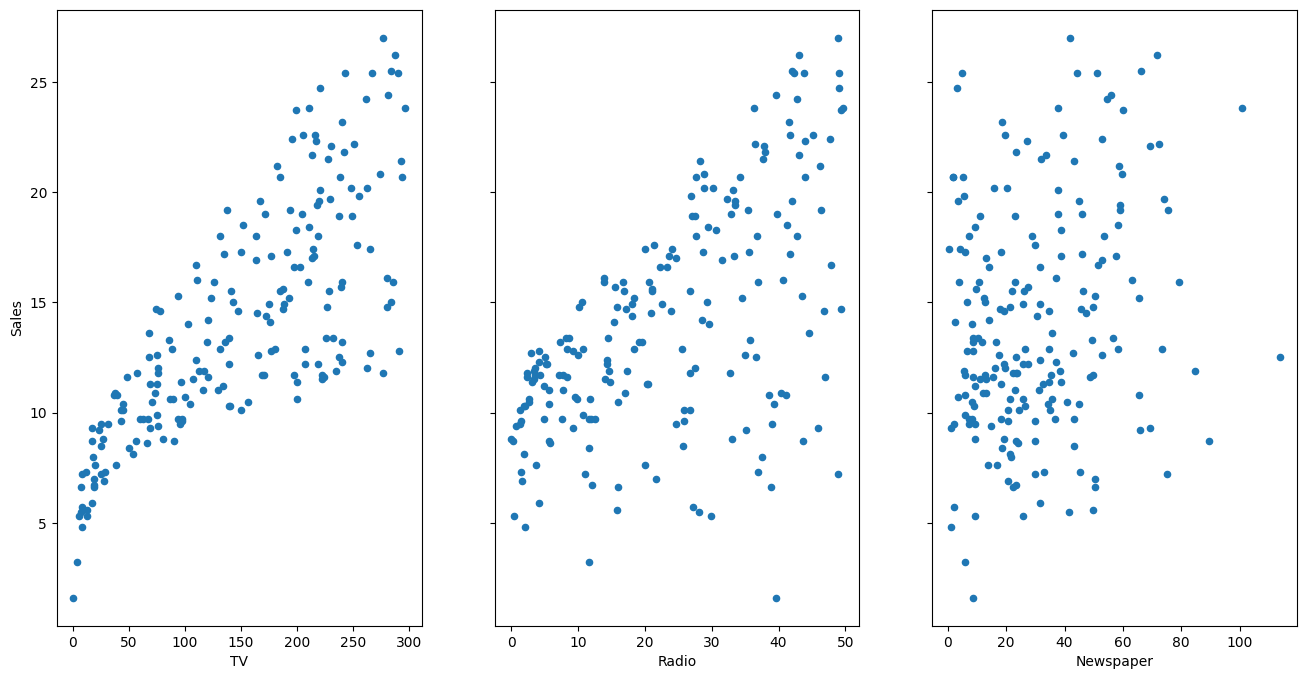

In [14]:
fig,axs= plt.subplots(1,3,sharey=True)
data.plot(kind="scatter",x='TV',y='Sales',ax=axs[0],figsize=(16,8))
data.plot(kind="scatter",x='Radio',y='Sales',ax=axs[1],figsize=(16,8))
data.plot(kind="scatter",x='Newspaper',y='Sales',ax=axs[2],figsize=(16,8))

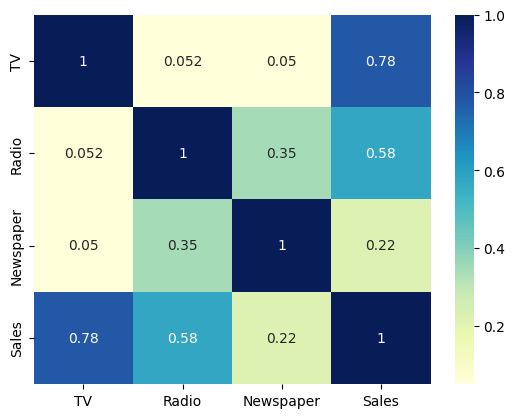

In [50]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
#rmoving the outlier from newspaper

data=data[data['Newspaper']<=90]
data.shape

(198, 4)

In [16]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


###### Now We Have Clean Data

In [17]:
# Separating input and output data

x=data.drop(columns=['Sales'])
y=data['Sales']

In [18]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
x_train.tail()

,TV,Radio,Newspaper
108,13.1,0.4,25.6
109,255.4,26.9,5.5
146,240.1,7.3,8.7
96,197.6,3.5,5.9
118,125.7,36.9,79.2


In [23]:
y_test.tail()

10      8.6
116    12.2
12      9.2
159    12.9
128    24.7
Name: Sales, dtype: float64

In [52]:
print(x.shape,y.shape)

(198, 3) (198,)


##### Model building & deployment

In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [25]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')
scaler=StandardScaler()
oe=OrdinalEncoder()

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import  mean_squared_error , r2_score

In [61]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [62]:
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
print(knn_train_pred, knn_test_pred)

[ 6.26 11.04 14.2  11.26 16.58 16.26  8.52  6.02 13.94 14.02 14.1  20.14
 13.54 24.74 14.52 19.48 19.82 12.18  6.78 10.76 10.98 15.36 11.68 20.26
 17.28 15.92 17.28  9.66  6.66 13.76 18.88 15.02 21.4   5.64 13.46 14.38
 10.34 13.82 13.86 12.66 10.22 21.62 12.1  14.36 19.14 13.08  9.8   7.84
 24.48 15.6  11.42 10.36 22.6  14.38 12.62 13.2  11.14  8.52 13.76  9.2
  9.74 16.68  5.94 22.5  10.18 10.52 19.16 15.94 10.22 15.36 13.78 15.
 24.62 13.2  12.18 14.38 15.   15.02 16.46 11.06 18.54  9.4  12.24 10.04
 10.16 10.92 12.72 24.06 15.12 15.6  19.82 14.04 17.66 11.4   9.84  8.52
 19.34 13.06 10.76  7.14  6.4  17.7  21.8  10.32 11.18  9.4  14.22 15.44
 24.46  9.66  6.78 12.44 17.74 10.68 24.46 22.38  9.24 14.1  16.46 12.3
 21.54 11.46 22.38  9.32 14.3   6.98 13.9   9.64 18.58  8.7  22.   15.7
 11.46 21.76 10.04 10.58 13.74 15.7  14.72 18.84 23.72  8.52 16.7  11.42
 12.08 10.26 15.54 16.08  7.84  6.78 11.14  9.08 16.1   6.66 19.6  13.32
 13.42 16.86] [ 9.6   5.1  16.86 10.34  6.84 18.92 19.92

In [63]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [64]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.8959037125875932
RMSE: 1.8438221172336553


C:\Users\sohel\AppData\Local\Temp\ipykernel_12868\1364884034.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)


In [65]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.951793,0.895904,1.843822,0.055889


# Linear Regression Model

In [66]:

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
pipe=make_pipeline(column_trans,scaler,lr)
pipe.fit(x_train,y_train)
y_pred_lr=pipe.predict(x_test)
r2_score(y_test,y_pred_lr)

0.9289686001456806

# Decision Tree Regression Model

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
pipe=make_pipeline(column_trans,scaler,dt)
pipe.fit(x_train,y_train)
y_pred_dt=pipe.predict(x_test)
r2_score(y_test,y_pred_dt)

0.9603861034450886

# Random Forest Regression Model

In [68]:
from sklearn.ensemble import RandomForestRegressor
r=RandomForestRegressor(n_estimators=10,random_state=0)
pipe=make_pipeline(column_trans,scaler,r)
pipe.fit(x_train,y_train)
y_pred_r=pipe.predict(x_test)
r2_score(y_test,y_pred_r)

0.9800159948283771

### As Random Forest Regressor Working Best So I'm Using That

In [69]:
#Let's Check predict function working Good or Not

pipe.predict([[283.6,42.0,66.2]]) #Original ans 25.5

array([25.53])

In [70]:
pipe.predict([[112.9,17.4,38.6]]) #Original ans 11.9

array([12.25])

##### Now Lets Make The Model For Deployment

In [77]:
import pickle

In [78]:
pickle.dump(pipe,open('sales.pkl','wb'))